**Description**: Analyze accuracies for $m = 100, n = 50$ where GPT-2 was pretrained for
2 epochs instead of 1.

**Estimated runtime**: 1 hour 

In [1]:
import os
import sys
from typing import Literal

import seaborn as sns

# sys hack to import from grandparent
sys.path.append(os.path.abspath(os.path.join("..", "..")))
import utils

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
num_train: Literal[50, 100] = 100
num_test: Literal[50, 100, 200, 500] = 50

In [3]:
sns.set_theme(style="darkgrid")

# Load data

In [4]:
accuracies_home_dir = os.path.join("..", "..", "accuracies_gpt2_epochs_2")
accuracy_df = utils.load_all_accuracies(
    os.path.join(accuracies_home_dir, f"m{num_train}"), num_test
)  # for plot
num_correct_df = utils.load_all_num_correct(
    os.path.join(accuracies_home_dir, f"m{num_train}"), num_test
)  # for model

In [5]:
equation = "p(num_correct, num_test) ~ method + (1|dataset/pair)"
id_vars = ("num_test", "pair", "dataset")

# Plot

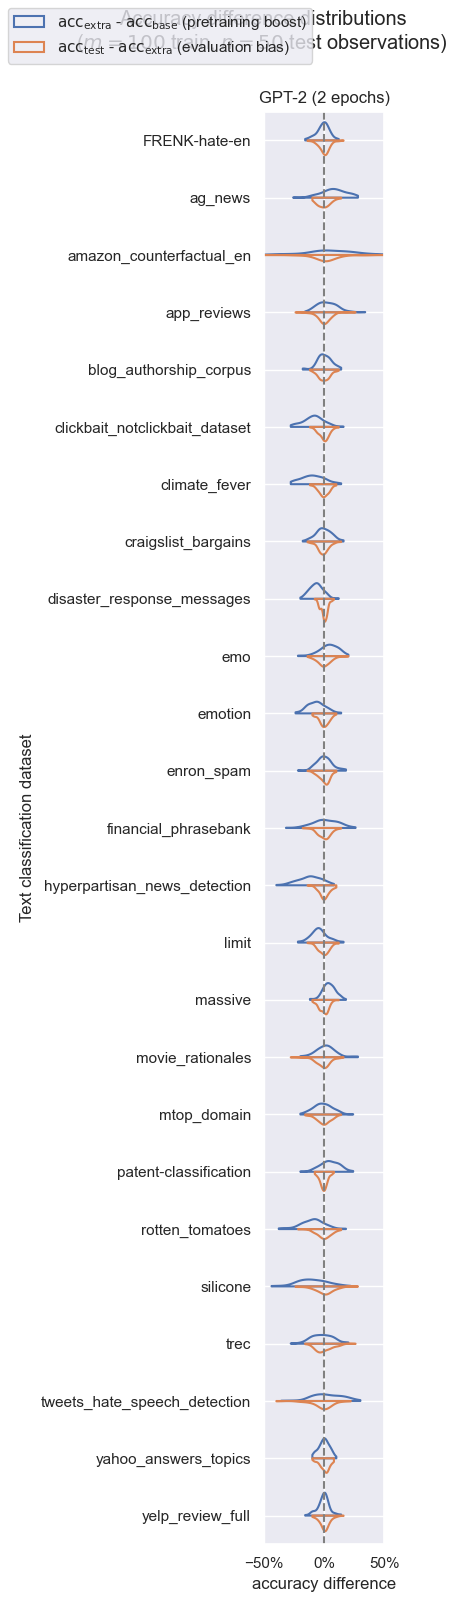

In [6]:
utils.violin_plot_multiple_lms(accuracy_df, num_test, num_train)

# Control

In [7]:
summary_control, summary_relative_control = utils.eda(
    accuracy_df, treatment="extra", control="base"
)

Overall difference:
┌─────────┬──────────┐
│ mean    ┆ se       │
╞═════════╪══════════╡
│ -0.0156 ┆ 0.010912 │
└─────────┴──────────┘
Overall difference (relative):
┌──────┬─────┐
│ mean ┆ se  │
╞══════╪═════╡
│ inf  ┆ NaN │
└──────┴─────┘


In [8]:
summary_control

dataset,mean,se
"""FRENK-hate-en""",-0.0114,0.005529
"""ag_news""",0.0798,0.010271
"""amazon_counter…",0.0506,0.021734
"""app_reviews""",0.024,0.008447
"""blog_authorshi…",0.0024,0.006066
…,…,…
"""silicone""",-0.095,0.012525
"""trec""",-0.015,0.00923
"""tweets_hate_sp…",0.0276,0.012507
"""yahoo_answers_…",-0.0024,0.004461


In [9]:
summary_relative_control

dataset,mean,se
"""FRENK-hate-en""",-0.016812,0.011451
"""ag_news""",0.199735,0.024854
"""amazon_counter…",0.163068,0.060315
"""app_reviews""",0.391046,0.133691
"""blog_authorshi…",0.01115,0.011775
…,…,…
"""silicone""",-0.15669,0.028438
"""trec""",0.019635,0.038991
"""tweets_hate_sp…",0.069471,0.022194
"""yahoo_answers_…",0.129952,0.071393


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [Intercept, method, 1|dataset_sigma, 1|dataset_offset, 1|dataset:pair_sigma, 1|dataset:pair_offset]


Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 794 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


Sampling posterior predictive. This will take at least 30 min. Maybe 2 hrs for this size data


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
method[extra],-0.08283,0.00925,-0.09729,-0.06793,0.00011,0.00008,6514.50475,3118.89658,1.00241


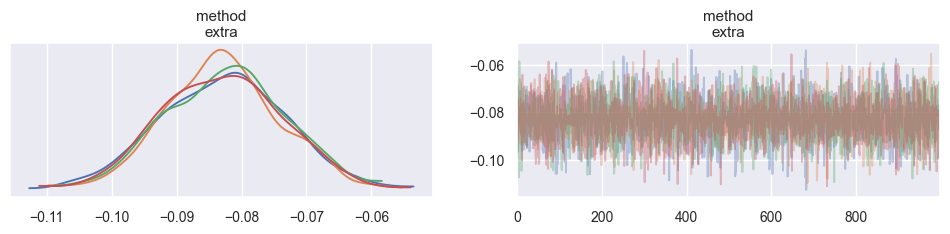

In [10]:
model_control, summary_control, az_summary_control = utils.stat_model(
    num_correct_df,
    treatment="extra",
    control="base",
    equation=equation,
    id_vars=id_vars,
)

In [11]:
print(model_control)

       Formula: p(num_correct, num_test) ~ method + (1|dataset/pair)
        Family: binomial
          Link: p = logit
  Observations: 5000
        Priors: 
    target = p
        Common-level effects
            Intercept ~ Normal(mu: 0.0, sigma: 1.0)
            method ~ Normal(mu: 0.0, sigma: 1.0)
        
        Group-level effects
            1|dataset ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
            1|dataset:pair ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()


# Treatment

In [12]:
summary_bias, summary_relative_bias = utils.eda(
    accuracy_df, treatment="test", control="extra"
)

Overall difference:
┌───────────┬──────────┐
│ mean      ┆ se       │
╞═══════════╪══════════╡
│ -0.001488 ┆ 0.001139 │
└───────────┴──────────┘
Overall difference (relative):
┌──────────┬──────────┐
│ mean     ┆ se       │
╞══════════╪══════════╡
│ 0.026181 ┆ 0.008517 │
└──────────┴──────────┘


In [13]:
summary_bias

dataset,mean,se
"""FRENK-hate-en""",0.0016,0.004694
"""ag_news""",-0.0032,0.005376
"""amazon_counter…",0.014,0.013563
"""app_reviews""",-0.0012,0.00633
"""blog_authorshi…",-0.002,0.004828
…,…,…
"""silicone""",0.0016,0.008508
"""trec""",-0.0012,0.006985
"""tweets_hate_sp…",-0.0156,0.009422
"""yahoo_answers_…",0.0042,0.00421


In [14]:
summary_relative_bias

dataset,mean,se
"""FRENK-hate-en""",0.007857,0.009959
"""ag_news""",0.000422,0.010536
"""amazon_counter…",0.059124,0.032546
"""app_reviews""",0.047033,0.039263
"""blog_authorshi…",0.000319,0.009551
…,…,…
"""silicone""",0.028823,0.026611
"""trec""",0.019252,0.029705
"""tweets_hate_sp…",-0.012653,0.016302
"""yahoo_answers_…",0.153807,0.058883


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [Intercept, method, 1|dataset_sigma, 1|dataset_offset, 1|dataset:pair_sigma, 1|dataset:pair_offset]


Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 676 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


Sampling posterior predictive. This will take at least 30 min. Maybe 2 hrs for this size data


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
method[test],-0.00814,0.00908,-0.02182,0.00719,0.00011,0.00012,6239.57838,3116.22932,1.00088


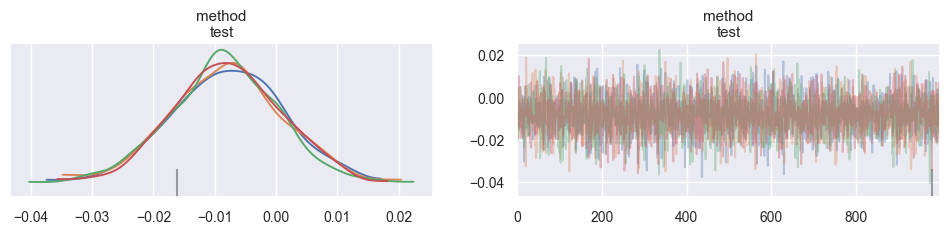

In [15]:
model_bias, summary_bias, az_summary_bias = utils.stat_model(
    num_correct_df,
    treatment="test",
    control="extra",
    equation=equation,
    id_vars=id_vars,
)

In [16]:
print(model_bias)

       Formula: p(num_correct, num_test) ~ method + (1|dataset/pair)
        Family: binomial
          Link: p = logit
  Observations: 5000
        Priors: 
    target = p
        Common-level effects
            Intercept ~ Normal(mu: 0.0, sigma: 1.0)
            method ~ Normal(mu: 0.0, sigma: 1.0)
        
        Group-level effects
            1|dataset ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
            1|dataset:pair ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()


# Write inference data

In [17]:
netcdfs = os.path.join("..", "..", "netcdfs", "gpt2-epochs-2", f"m{num_train}")
if not os.path.exists(netcdfs):
    os.makedirs(netcdfs)

In [18]:
summary_control.to_netcdf(
    filename=os.path.join(netcdfs, f"main_m{num_train}_n{num_test}_control.nc")
)

'../../netcdfs/gpt2-epochs-2/m100/main_m100_n50_control.nc'

In [19]:
summary_bias.to_netcdf(
    filename=os.path.join(netcdfs, f"main_m{num_train}_n{num_test}_treatment.nc")
)

'../../netcdfs/gpt2-epochs-2/m100/main_m100_n50_treatment.nc'